## supplychain + linearprogramming
BI名企班 谢雅楠 20201108

### Thinking
1. 常见的规划问题都包括哪些？  
LP (Linear Programming) 线性规划 -- 研究线性约束条件下线性目标函数的极值问题  
ILP (Integer Linear Programming) 整数线性规划 -- 全部决策变量必须为整数  
MIP (Mixed Integer Programming) 混合整数规划 -- 混合整数规划是LP的一种，其中部分的决策变量是整数（不要求全部都是整数）  
VRP（Vehicle Routing Problem） 车辆路径问题


2. 常用的规划工具包都有哪些？  
pulp --只用于线性模型，包括如整数规划、01规划，还是混合整数线性规划 MILP  
ortools -- Google开发，用于优化的开源软件, 可以解决车辆路径、流程、整数和线性规划等问题,提供了C++,Python,Java,.NET接口


  3. RFM模型的原理是怎样的   
Recency：客户最近购买  
Frequency：客户购物的频率  
Monetary：客户在购买上花费了多少钱  

新近度，频率，货币价值（RFM）是一种营销分析工具，用于根据公司的消费习惯的性质来确定公司的最佳客户。  
RFM分析通过将客户和客户分为三类来评估客户和客户：他们最近进行的购买，购买的频率以及购买的规模。  
RFM分析可帮助公司合理地预测将来哪些客户更有可能再次进行购买，新客户（相对于回头客）有多少收入以及如何将偶尔的购买者转变为惯用的购买者。  
  


Recency  
客户在公司购买商品的时间越近，就越有可能在以后的购买中继续牢记业务和品牌。与几个月甚至更长的时间没有从公司购买商品的客户相比，可以说与新客户进行未来交易的可能性更高。  

此类信息可用于提醒近期的客户尽快重新访问业务，以继续满足他们的购买需求。为了不忽视失败的客户，可以进行市场营销活动，以提醒他们自上次交易以来已经有一段时间了，同时还为他们提供了重新点燃顾客惠顾的动机。  

Frequency  
客户交易的频率可能会受到诸如产品类型，购买价格点以及需要补货或更换等因素的影响。如果可以预测购买周期，例如，当客户需要购买新杂货时，则可以将营销工作直接用于提醒他们在鸡蛋或牛奶等物品用完后去拜访商家。  

Monetary   
货币价值源于客户在交易过程中在业务上支出的利润丰厚。自然而然地倾向于将重点放在鼓励花费最多钱的客户继续这样做。尽管这可以在市场营销和客户服务方面产生更好的投资回报，但也存在疏远那些始终如一但在每次交易中花费不多的客户的风险。    

  
  
  RFM分析从数字上对这三个类别中的每个类别的客户进行排名，通常以1到5的等级（数字越高，结果越好）。“最佳”客户将在每个类别中获得最高分。    


这三个RFM因素可用于合理地预测客户与一家公司再次开展业务的可能性（或可能性不大），或者对于慈善组织而言，又进行一次捐赠。

RFM的概念源于Jan Roelf Bult和Tom Wansbeek在1995年出版的Marketing Science上发表的文章“Optimal Selection for Direct Mail”。  
它通常支持营销格言 “80％的业务来自20％的客户”。  

ref.https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp#:~:text=Recency%2C%20frequency%2C%20monetary%20value%20is,a%20customer%20makes%20a%20purchase


## Action1 Supply Chain

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


In [2]:
## load data
with open('data.pkl', 'rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,HollowayCally,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,LunaIrene,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,MaldonadoGillian,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TateTana,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,HendricksOrli,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,PetersonMaria,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,ClarkRonald,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,SmithJohn,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,SmithMary,2016,1,4,20,2016-01


In [3]:
## fraud
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['fraud']
train_data['fraud'].sum()

4062

In [4]:
## late delivery
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)
train_data['late_delivery'].sum()

98977

In [5]:
for column in train_data.columns:
    if len(train_data[column].value_counts()) < 2:
        print(column)

Customer Email
Customer Password
Product Description
Product Status


In [6]:
train_data.drop(
    ['Customer Email',
     'Customer Password',
     'Product Description',
     'Product Status',
     'Product Image',
     'Product Description',
     'Customer Lname',
     'Customer Fname',
     'Customer Full Name'
     ], axis=1, inplace=True)

In [7]:
train_data.drop(
    ['Order Customer Id',
     'Order Item Cardprod Id',
     'Order Item Id',
     'Sales per customer',
     'Order Item Total',
     'Order Profit Per Order',
     'Product Card Id',
     'Product Category Id',
     'Product Price'
     ], axis=1, inplace=True)

In [8]:
train_data.drop(
    ['Order Zipcode',
     'shipping date (DateOrders)',
     'Latitude',
     'Longitude',
     'Customer Street'
     ], axis=1, inplace=True)

In [9]:
## categorical variables
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'Shipping Mode'],
      dtype='object')

In [10]:
## label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in categorical_cols:
    train_data[cat] = le.fit_transform(train_data[cat])
train_data[categorical_cols]

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode
0,1,0,40,66,1,0,36,4,3,331,70,15,475,2,78,3
1,3,1,40,66,1,0,36,4,3,391,69,13,841,5,78,3
2,0,3,40,452,0,0,5,4,3,391,69,13,841,1,78,3
3,1,0,40,285,0,2,5,4,3,3226,8,11,835,2,78,3
4,2,0,40,66,1,1,36,4,3,3226,8,11,835,6,78,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,3,18,59,0,2,31,3,3,2922,31,7,913,1,24,3
180515,1,1,18,26,0,1,5,3,3,1362,77,7,770,2,24,2
180516,3,1,18,55,0,1,7,3,3,25,8,11,88,5,24,3
180517,2,0,18,66,1,0,36,3,3,25,8,11,88,6,24,3


In [11]:
## numerical variables
numerical_cols = train_data.columns.to_list()
for x in categorical_cols.to_list():
    numerical_cols.remove(x)
numerical_cols

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'order_month_year',
 'fraud',
 'late_delivery']

In [12]:
# period
train_data.drop(
    ['order date (DateOrders)'
     ], axis=1, inplace=True)

In [13]:
# timestamp
train_data.drop(
    ['order_month_year'
     ], axis=1, inplace=True)

In [14]:
# late fraud
train_data.drop(
    ['Order Status',
     'Delivery Status'], axis=1, inplace=True)

In [15]:
train_data.drop(
    ['Late_delivery_risk'], axis=1, inplace=True)

### 1.Classification
对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'  
对于迟交货订单进行预测，即Delivery Status= 'Late delivery'

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm

In [18]:
## evaluation matrix

accuracy_list = {}
recall_list = {}
auc_list = {}
f1_list = {}

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, confusion_matrix
def model_stats(model, x_train, x_test, y_train, y_test, name):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    auc = roc_auc_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    confusion = confusion_matrix(y_pred, y_test)
    
    
    accuracy_list[name,model] = accuracy
    recall_list[name,model] = recall
    auc_list[name,model] = auc
    f1_list[name,model] = f1
    
    
    
    print('Model Used:', model)
    print('{} Accuracy: {}%'.format(name, accuracy*100))
    print('{} Recall: {}%'.format(name, recall*100))
    print('{} AUC: {}%'.format(name, auc*100))
    print('{} F1 score: {}%'.format(name, f1*100))
    print('{} Confusion Matrix: \n{}'.format(name, confusion))
    
    return

In [19]:
## train_data['fraud']
x_fraud = train_data.loc[:,train_data.columns != 'fraud']
y_fraud = train_data['fraud']

## train test split
from sklearn.model_selection import train_test_split
x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size=0.2)

## standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)

In [20]:
## train_data['late_delivery']
x_late = train_data.loc[:,train_data.columns != 'late_delivery']
y_late = train_data['late_delivery']

## train test split
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late, y_late, test_size=0.2)

## standardisation
sc = StandardScaler()
x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [21]:
## logistic regression
model_fraud = LogisticRegression()
model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)
model_late = LogisticRegression()
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='late delivery')

Model Used: LogisticRegression()
Fraud Accuracy: 97.82849545756703%
Fraud Recall: 56.9023569023569%
Fraud AUC: 77.53515644430829%
Fraud F1 score: 30.12477718360071%
Fraud Confusion Matrix: 
[[35151   656]
 [  128   169]]
----------------------------------------
Model Used: LogisticRegression()
late delivery Accuracy: 98.8339242189231%
late delivery Recall: 97.91315554674334%
late delivery AUC: 98.95657777337166%
late delivery F1 score: 98.94557567560798%
late delivery Confusion Matrix: 
[[15930     0]
 [  421 19753]]


In [22]:
## GussianNB
model_fraud_gnb = GaussianNB()
model_stats(model_fraud_gnb, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)

model_late_gnb = GaussianNB()
model_stats(model_late_gnb, x_late_train, x_late_test, y_late_train, y_late_test, name='Late delivery')

Model Used: GaussianNB()
Fraud Accuracy: 87.99578994017283%
Fraud Recall: 15.991471215351813%
Fraud AUC: 57.995735607675904%
Fraud F1 score: 27.573529411764707%
Fraud Confusion Matrix: 
[[30945     0]
 [ 4334   825]]
----------------------------------------
Model Used: GaussianNB()
Late delivery Accuracy: 56.932749833813425%
Late delivery Recall: 55.95433686476687%
Late delivery AUC: 77.97716843238344%
Late delivery F1 score: 71.7573335755154%
Late delivery Confusion Matrix: 
[[  802     0]
 [15549 19753]]


In [50]:
## BernoulliNB
model_fraud_bnb = BernoulliNB()
model_stats(model_fraud_bnb, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)

model_late_bnb = BernoulliNB()
model_stats(model_late_bnb, x_late_train, x_late_test, y_late_train, y_late_test, name='Late delivery')

##ValueError: 
#Only one class present in y_true. ROC AUC score is not defined in that case.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Used: BernoulliNB()
Fraud Accuracy: 97.77586970972746%
Fraud Recall: 0.0%
Fraud F1 score: 0.0%
Fraud Confusion Matrix: 
[[35301   803]
 [    0     0]]
----------------------------------------
Model Used: BernoulliNB()
Late delivery Accuracy: 70.10580545091956%
Late delivery Recall: 82.05741626794259%
Late delivery F1 score: 68.3647448486092%
Late delivery Confusion Matrix: 
[[13649  8243]
 [ 2550 11662]]


In [23]:
## SVM
model_fraud_svm = svm.LinearSVC()
model_stats(model_fraud_svm, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)
model_late_svm = svm.LinearSVC()
model_stats(model_late_svm, x_late_train, x_late_test, y_late_train, y_late_test, name='Late delivery')


Model Used: LinearSVC()
Fraud Accuracy: 97.80079769554621%
Fraud Recall: 56.2753036437247%
Fraud AUC: 77.18107430561726%
Fraud F1 score: 25.932835820895523%
Fraud Confusion Matrix: 
[[35171   686]
 [  108   139]]
----------------------------------------
Model Used: LinearSVC()
Late delivery Accuracy: 98.8339242189231%
Late delivery Recall: 97.91315554674334%
Late delivery AUC: 98.95657777337166%
Late delivery F1 score: 98.94557567560798%
Late delivery Confusion Matrix: 
[[15930     0]
 [  421 19753]]


In [24]:
## Decision tree
model_fraud_dt = DecisionTreeClassifier()
model_stats(model_fraud_dt, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)
model_late_dt = DecisionTreeClassifier()
model_stats(model_late_dt, x_late_train, x_late_test, y_late_train, y_late_test, name='Late delivery')

Model Used: DecisionTreeClassifier()
Fraud Accuracy: 99.12752049634389%
Fraud Recall: 82.03517587939699%
Fraud AUC: 90.77401707757095%
Fraud F1 score: 80.56755089450957%
Fraud Confusion Matrix: 
[[35136   172]
 [  143   653]]
----------------------------------------
Model Used: DecisionTreeClassifier()
Late delivery Accuracy: 99.29370706846888%
Late delivery Recall: 99.32206819791561%
Late delivery AUC: 99.29073173636753%
Late delivery F1 score: 99.35474075761027%
Late delivery Confusion Matrix: 
[[16217   121]
 [  134 19632]]


In [25]:
### Decision Tree 解释性分析 -- feature importance

# fraud
important_col = model_fraud_dt.feature_importances_.argsort()
# important_col
feature_importance_fraud_dt = pd.DataFrame({'features':x_fraud.columns[important_col],
                                           'importance':model_fraud_dt.feature_importances_[important_col]})

feature_importance_fraud_dt

,features,importance
0,Department Id,0.001484
1,Customer Country,0.001496
2,Department Name,0.001496
3,Order Item Quantity,0.002088
4,Order Item Product Price,0.002633
5,Category Name,0.004214
6,Category Id,0.005691
7,Sales,0.005737
8,order_year,0.005825
9,Product Name,0.006084


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

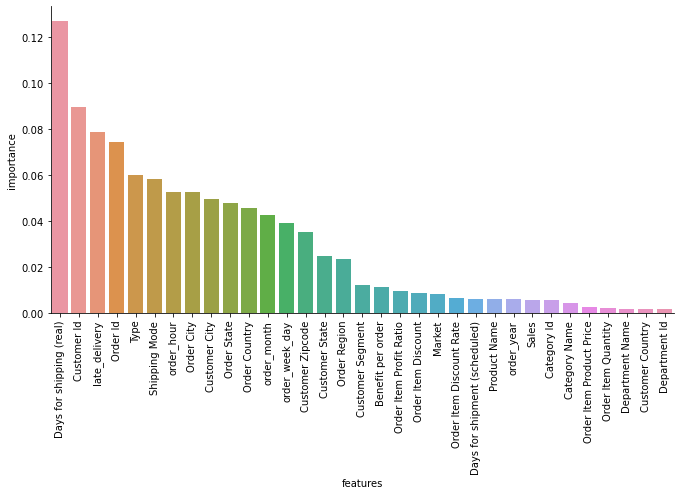

In [26]:
# plot feature importance
feature_importance_fraud_dt = feature_importance_fraud_dt.sort_values('importance', ascending=False)

sns.catplot(x='features', 
            y='importance', 
            data=feature_importance_fraud_dt, 
            kind='bar',
            height=5,
            aspect=2)
plt.xticks(rotation='vertical')

In [27]:
## 神经网络
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

keras.layers.BatchNormalization()
classifier = Sequential()

# 第1层
classifier.add(Dense(1024, 
                     activation='relu',
                     input_dim=x_fraud_train.shape[1]))
# 第2层
classifier.add(Dense(512, activation='relu'))
# 第3层
classifier.add(Dense(256, activation='relu'))
# 第4层
classifier.add(Dense(128, activation='relu'))
# 第5层
classifier.add(Dense(64, activation='relu'))
# 第6层
classifier.add(Dense(32, activation='relu'))
# 第7层
classifier.add(Dense(16, activation='relu'))
# 第8层
classifier.add(Dense(8, activation='relu'))
# 第9层
classifier.add(Dense(4, activation='relu'))
# 第10层
classifier.add(Dense(2, activation='relu'))

# 输出层
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

classifier.fit(x_fraud_train, y_fraud_train, batch_size=512, epochs=10)

Epoch 1/10
283/283 [==============================] - 3s 11ms/step - loss: 0.6306 - accuracy: 0.9776
Epoch 2/10
283/283 [==============================] - 3s 11ms/step - loss: 0.5222 - accuracy: 0.9776
Epoch 3/10
283/283 [==============================] - 3s 12ms/step - loss: 0.4366 - accuracy: 0.9776
Epoch 4/10
283/283 [==============================] - 4s 14ms/step - loss: 0.3693 - accuracy: 0.9776
Epoch 5/10
283/283 [==============================] - 4s 14ms/step - loss: 0.3163 - accuracy: 0.9776
Epoch 6/10
283/283 [==============================] - 4s 13ms/step - loss: 0.2746 - accuracy: 0.9776
Epoch 7/10
283/283 [==============================] - 3s 12ms/step - loss: 0.2414 - accuracy: 0.9776
Epoch 8/10
283/283 [==============================] - 3s 12ms/step - loss: 0.2149 - accuracy: 0.9776
Epoch 9/10
283/283 [==============================] - 3s 11ms/step - loss: 0.1937 - accuracy: 0.9776
Epoch 10/10
283/283 [==============================] - 3s 11ms/step - loss: 0.1766 - accura

In [28]:
train_evaluate = classifier.evaluate(x_fraud_train, y_fraud_train)
test_evaluate = classifier.evaluate(x_fraud_test, y_fraud_test)
print('accuracy on training set: ', train_evaluate)
print('accuracy on test set: ', test_evaluate)


1129/1129 [==============================] - 1s 890us/step - loss: 0.1700 - accuracy: 0.9771
accuracy on training set:  [0.1691596359014511, 0.9775854349136353]
accuracy on test set:  [0.1700417846441269, 0.9771493673324585]


In [30]:
## KNN
model_fraud_knn = KNeighborsClassifier(n_neighbors=3)
model_stats(model_fraud_knn, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)
model_late_knn = KNeighborsClassifier(n_neighbors=3)
model_stats(model_late_knn, x_late_train, x_late_test, y_late_train, y_late_test, name='Late delivery')

Model Used: KNeighborsClassifier(n_neighbors=3)
Fraud Accuracy: 97.80356747174828%
Fraud Recall: 56.72268907563025%
Fraud AUC: 77.39943074759597%
Fraud F1 score: 25.399811853245534%
Fraud Confusion Matrix: 
[[35176   690]
 [  103   135]]
----------------------------------------
Model Used: KNeighborsClassifier(n_neighbors=3)
Late delivery Accuracy: 84.66097939286506%
Late delivery Recall: 86.11718075105442%
Late delivery AUC: 84.51673345010865%
Late delivery F1 score: 85.95556908094949%
Late delivery Confusion Matrix: 
[[13619  2806]
 [ 2732 16947]]


In [31]:
## LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_fraud_lda = LinearDiscriminantAnalysis()
model_stats(model_fraud_lda, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)
model_late_lda = LinearDiscriminantAnalysis()
model_stats(model_late_lda, x_late_train, x_late_test, y_late_train, y_late_test, name='Late delivery')

Model Used: LinearDiscriminantAnalysis()
Fraud Accuracy: 97.93374695324619%
Fraud Recall: 56.683587140439926%
Fraud AUC: 77.65190536026869%
Fraud F1 score: 47.31638418079096%
Fraud Confusion Matrix: 
[[35023   490]
 [  256   335]]
----------------------------------------
Model Used: LinearDiscriminantAnalysis()
Late delivery Accuracy: 98.42399734101484%
Late delivery Recall: 97.69766285430134%
Late delivery AUC: 98.51745716180118%
Late delivery F1 score: 98.57261119333718%
Late delivery Confusion Matrix: 
[[15888   106]
 [  463 19647]]


In [32]:
## Random Forest
model_fraud_rf = RandomForestClassifier()
model_stats(model_fraud_rf, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)
model_late_rf = RandomForestClassifier()
model_stats(model_late_rf, x_late_train, x_late_test, y_late_train, y_late_test, name='Late delivery')

Model Used: RandomForestClassifier()
Fraud Accuracy: 98.80068690449811%
Fraud Recall: 97.80487804878048%
Fraud AUC: 98.3085016679718%
Fraud F1 score: 64.93927125506073%
Fraud Confusion Matrix: 
[[35270   424]
 [    9   401]]
----------------------------------------
Model Used: RandomForestClassifier()
Late delivery Accuracy: 99.04165743407933%
Late delivery Recall: 98.27852131946862%
Late delivery AUC: 99.1392606597343%
Late delivery F1 score: 99.13178761417244%
Late delivery Confusion Matrix: 
[[16005     0]
 [  346 19753]]


In [34]:
## xgboost

import xgboost as xgb
model_fraud_xgb = xgb.XGBClassifier()
model_stats(model_fraud_xgb, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')

print('-' * 40)
model_late_xgb = xgb.XGBClassifier()
model_stats(model_late_xgb, x_late_train, x_late_test, y_late_train, y_late_test, name='Late delivery')

Model Used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Fraud Accuracy: 98.93086638599601%
Fraud Recall: 91.33709981167608%
Fraud AUC: 95.19065937088176%
Fraud F1 score: 71.53392330383481%
Fraud Confusion Matrix: 
[[35233   340]
 [   46   485]]
----------------------------------------
Model Used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importa

### 2. Regression
对于销售额进行预测，即Sales字段  
对于订货数量进行预测，即Order Item Quantity

In [35]:
## train_data['Sales']
x_sales = train_data.loc[:,train_data.columns != 'Sales']
y_sales = train_data['Sales']

## train test split
from sklearn.model_selection import train_test_split
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2)

## standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sales_train = sc.fit_transform(x_sales_train)
x_sales_test = sc.transform(x_sales_test)

In [36]:
## train_data['Order Item Quantity']
x_quantity = train_data.loc[:,train_data.columns != 'Order Item Quantity']
y_quantity = train_data['Order Item Quantity']

## train test split
from sklearn.model_selection import train_test_split
x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test = train_test_split(x_quantity, y_quantity, test_size=0.2)

## standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_quantity_train = sc.fit_transform(x_quantity_train)
x_quantity_test = sc.transform(x_quantity_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def regression_model_stats(model, x_train, x_test, y_train, y_test, name):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    
    print('Model Used:', model)
    print('{} MAE: {}'.format(name, mae))
    print('{} MSE: {}'.format(name, mse))
    
    return

In [43]:
## Linear Regression

from sklearn.linear_model import LinearRegression
model_sales_lr = LinearRegression()
regression_model_stats(model_sales_lr, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

print('-' * 40)
model_quantity_lr = LinearRegression()
regression_model_stats(model_quantity_lr, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, name='Quantity')

Model Used: LinearRegression()
Sales MAE: 18.392820403518577
Sales MSE: 951.9916958085857
----------------------------------------
Model Used: LinearRegression()
Quantity MAE: 0.3466815780791314
Quantity MSE: 0.2813131587044076


In [45]:
## Lasso Regression

from sklearn.linear_model import Lasso
model_sales_lassoregression = Lasso()
regression_model_stats(model_sales_lassoregression, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

print('-' * 40)
model_quantity_lassoregression = Lasso()
regression_model_stats(model_quantity_lassoregression, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, name='Quantity')


Model Used: Lasso()
Sales MAE: 17.5874356307555
Sales MSE: 962.4472250170961
----------------------------------------
Model Used: Lasso()
Quantity MAE: 1.2681426047073217
Quantity MSE: 2.1124211291511847


In [46]:
## Ridge Regression

from sklearn.linear_model import Ridge
model_sales_ridgeregression = Ridge()
regression_model_stats(model_sales_ridgeregression, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

print('-' * 40)
model_quantity_ridgeregression = Ridge()
regression_model_stats(model_quantity_ridgeregression, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, name='Quantity')


Model Used: Ridge()
Sales MAE: 18.39286468692541
Sales MSE: 951.9932070418713
----------------------------------------
Model Used: Ridge()
Quantity MAE: 0.3466891900821907
Quantity MSE: 0.2813140146066202


In [47]:
## Decision Tree

model_sales_dt = DecisionTreeRegressor()
regression_model_stats(model_sales_dt, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

print('-' * 40)
model_quantity_dt = DecisionTreeRegressor()
regression_model_stats(model_quantity_dt, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, name='Quantity')


Model Used: DecisionTreeRegressor()
Sales MAE: 8.505825681629205e-12
Sales MSE: 1.3120501728960236e-22
----------------------------------------
Model Used: DecisionTreeRegressor()
Quantity MAE: 0.0
Quantity MSE: 0.0


In [48]:
## xgboost

model_sales_xgb = xgb.XGBRegressor()
regression_model_stats(model_sales_xgb, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

print('-' * 40)
model_quantity_xgb = xgb.XGBRegressor()
regression_model_stats(model_quantity_xgb, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, name='Quantity')


Model Used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Sales MAE: 0.010452471907095723
Sales MSE: 0.002420270203266641
----------------------------------------
Model Used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_chi

In [51]:
## lightgbm
import lightgbm as lgb

model_sales_lgb = lgb.LGBMRegressor()
regression_model_stats(model_sales_lgb, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

print('-' * 40)
model_quantity_lgb = lgb.LGBMRegressor()
regression_model_stats(model_quantity_lgb, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, name='Quantity')


Model Used: LGBMRegressor()
Sales MAE: 0.1277395572710281
Sales MSE: 2.7216934864225695
----------------------------------------
Model Used: LGBMRegressor()
Quantity MAE: 0.0004146871061645706
Quantity MSE: 1.060047772432019e-05


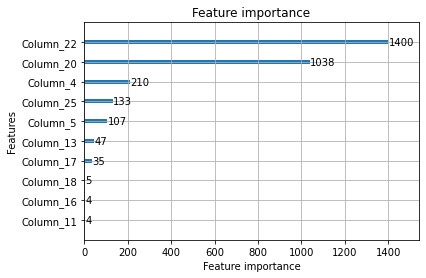

In [53]:
## lightgbm 解释性分析 (quantity)
from lightgbm import plot_importance
plot_importance(model_quantity_lgb, max_num_features=10)
plt.show()

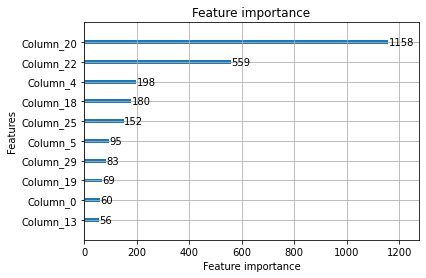

In [54]:
## lightgbm 解释性分析 (sales)
from lightgbm import plot_importance
plot_importance(model_sales_lgb, max_num_features=10)
plt.show()

In [52]:
## random forest

model_sales_rf = RandomForestRegressor()
regression_model_stats(model_sales_rf, x_sales_train, x_sales_test, y_sales_train, y_sales_test, name='Sales')

print('-' * 40)
model_quantity_rf = RandomForestRegressor()
regression_model_stats(model_quantity_rf, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, name='Quantity')


Model Used: RandomForestRegressor()
Sales MAE: 0.0007129624400564472
Sales MSE: 0.005808734312354192
----------------------------------------
Model Used: RandomForestRegressor()
Quantity MAE: 2.21582096166625e-06
Quantity MSE: 3.3237314424993047e-08


## Action 2: 
一个农民承包了6块耕地共300亩，准备播种小麦，玉米，水果和蔬菜四种农产品，已知各种农产品的计划播种面积、每块土地种植不同农产品的单产收益  
如何进行合理安排，使得总收益最大  
可以使用pulp/ortools工具

In [56]:
import pulp
import numpy as np
from pprint import pprint

In [79]:
def farming_problem(costs, x_max, y_max):
    row = len(costs)
    col = len(costs[0])
    
    
    # problem
    prob = pulp.LpProblem('Farming ', sense=pulp.LpMaximize)
    
    # variables
    var = [[pulp.LpVariable(f'x{i}{j}', lowBound=0, cat=pulp.LpInteger) for j in range(col)] for i in range(row)]
    
    # flatten
    flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]
    
    prob += pulp.lpDot(flatten(var), costs.flatten())
    for i in range(row):
        prob += pulp.lpSum(var[i]) <= x_max[i]
    for j in range(col):
        prob += pulp.lpSum([var[i][j] for j in range(row)]) <= y_max[j]
    prob.solve()
                    
    result = {'objective':pulp.value(prob.objective),
              'var': [[pulp.value(var[i][j]) for j in range(col)] for i in range(row)]}
    
    print(f'最大值为{result["objective"]}')
    print('各变量的取值为：')
    pprint(result['var'])
    
    return result


In [80]:
## 单亩收益
costs = np.array([[500, 550, 630, 1000, 800, 700],
                  [800, 700, 600, 950, 900, 930],
                  [1000, 960, 840, 650, 600, 700],
                  [1200, 1040, 980, 860, 880, 780]])

## 计划播种面积
max_plant = [76, 88, 96, 40]
# 地块面积
max_cultivation = [42, 56, 44, 39, 60, 59]

In [81]:
result = farming_problem(costs, max_plant, max_cultivation)

最大值为303280.0
各变量的取值为：
[[0.0, 0.0, 0.0, 76.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 88.0, 0.0, 0.0],
 [96.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [39.0, 0.0, 0.0, 0.0, 1.0, 0.0]]
